In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm

In [17]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


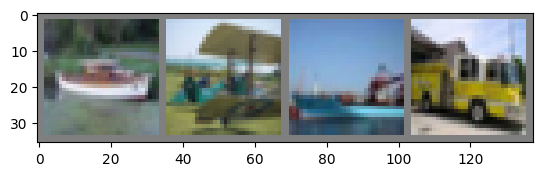

ship  plane ship  truck


In [32]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [6]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 12, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(12, 32, 5)
        self.conv3 = nn.Conv2d(32, 64, 5,padding=2)
        self.fc1 = nn.Linear(64 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x


net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

  0%|          | 0/4 [00:00<?, ?it/s]

[1,  2000] loss: 2.264
[1,  4000] loss: 1.985
[1,  6000] loss: 1.769
[1,  8000] loss: 1.670
[1, 10000] loss: 1.498
[1, 12000] loss: 1.431


 25%|██▌       | 1/4 [02:18<06:55, 138.40s/it]

[2,  2000] loss: 1.321
[2,  4000] loss: 1.297
[2,  6000] loss: 1.227
[2,  8000] loss: 1.204
[2, 10000] loss: 1.161
[2, 12000] loss: 1.118


 50%|█████     | 2/4 [04:34<04:34, 137.27s/it]

[3,  2000] loss: 1.033
[3,  4000] loss: 1.041
[3,  6000] loss: 1.006
[3,  8000] loss: 1.004
[3, 10000] loss: 0.981
[3, 12000] loss: 0.966


 75%|███████▌  | 3/4 [06:52<02:17, 137.51s/it]

[4,  2000] loss: 0.872
[4,  4000] loss: 0.874
[4,  6000] loss: 0.901
[4,  8000] loss: 0.877
[4, 10000] loss: 0.865
[4, 12000] loss: 0.885


100%|██████████| 4/4 [09:14<00:00, 138.60s/it]


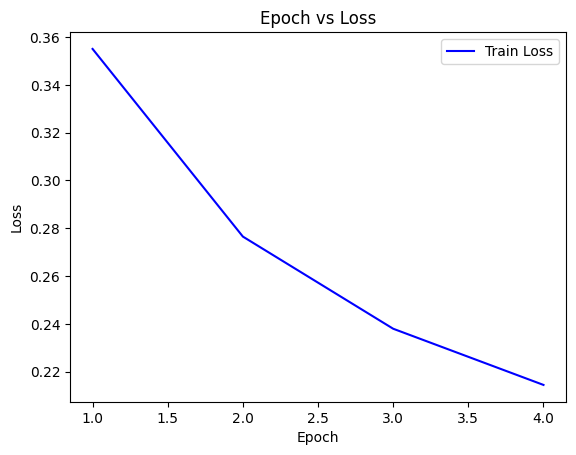

Finished Training


In [ ]:
train_epoch_losses = []
for epoch in tqdm(range(4)):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    train_epoch_losses.append(running_loss/2000)


# Plot the loss over epochs
plt.plot(range(1, 5), train_epoch_losses, color='blue', label='Train Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()
plt.show()

print('Finished Training')

In [4]:
PATH = 'cifar_net2.pth'
torch.save(net.state_dict(), PATH)

In [7]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [33]:
outputs = net(images1)

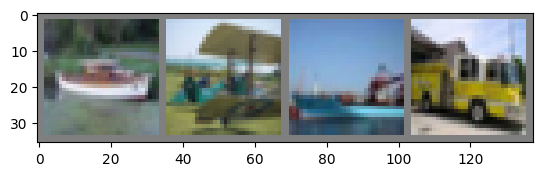

Predicted:  ship  truck ship  truck


In [34]:
_, predicted = torch.max(outputs, 1)

# show images
imshow(torchvision.utils.make_grid(images1))
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 67 %


Accuracy for class: plane is 78.7 %
Accuracy for class: car   is 79.4 %
Accuracy for class: bird  is 42.6 %
Accuracy for class: cat   is 48.9 %
Accuracy for class: deer  is 71.8 %
Accuracy for class: dog   is 58.6 %
Accuracy for class: frog  is 68.7 %
Accuracy for class: horse is 78.0 %
Accuracy for class: ship  is 75.7 %
Accuracy for class: truck is 77.2 %
Average Loss for the epoch: 0.9216


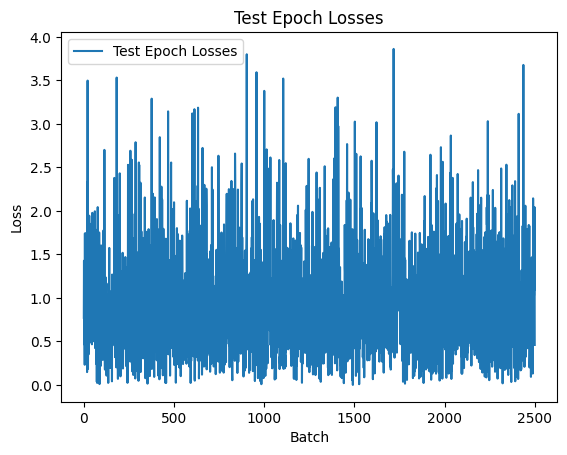

In [ ]:
# Prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
test_epoch_losses = []

# Again, no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)

        # Compute the loss for the batch
        loss = criterion(outputs, labels)
        test_epoch_losses.append(loss.item())

        # Collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# Print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

# Print average loss for the epoch
average_loss = sum(test_epoch_losses) / len(test_epoch_losses)
print(f'Average Loss for the epoch: {average_loss:.4f}')

# Plot test epoch losses
plt.plot(test_epoch_losses, label='Test Epoch Losses')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Test Epoch Losses')
plt.legend()
plt.show()

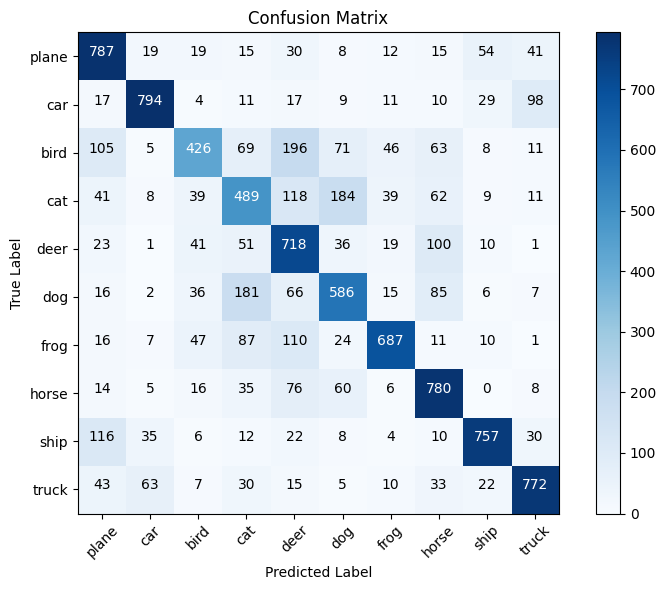

In [ ]:
import torch
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
class_names = classes

# Store predictions and labels for confusion matrix
all_predictions = []
all_labels = []

# Again, no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)

        # Collect predictions and labels
        all_predictions.extend(predictions.tolist())
        all_labels.extend(labels.tolist())

        # Collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# Compute confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)

# Plot confusion matrix with annotations
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)

# Add annotations (numbers) to each block of the confusion matrix
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if i == j else 'black')

plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()
